# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/prosperchuks/health-dataset?resource=download&select=hypertension_data.csv

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

About my dataset:

The Behavioral Risk Factor Surveillance System (BRFSS) - telephone sruvey conducted by the CDC
- collects data from US residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services
- collects data in all 50 states as well as the District of Columbia and three U.S. territories. 
- completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world

Business Issue: 
How does diabetes prevalence differ between individuals with normal BMI and those with BMIs in the overweight or obesity ranges?
What is the relationship between diabetes and other chronic conditions: high cholesterol, high blood pressure, heart disease or attack and stroke?
How does heavy alcohol consumption and smoking status correlate with diabetes status?
Is there a significant relationship between diabetes prevalence and the frequency of fruit (Fruits) or vegetable (Veggies) consumption?

In [85]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create three new dataframes for each csv
diabetes_df = pd.read_csv(r"diabetes_data.csv")

# Changing view so all columns will be displayed 
pd.set_option('display.max_columns', 200) 

# displaying all dfs 
display(diabetes_df.head(10))


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [86]:
# printing columns and defining them for quick reference
display(diabetes_df.columns)

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

Diabetes DF

Age: 13-level age category (_AGEG5YR see codebook) 
    1=18-24 2=25-29 3=30-34 4=35-39 5=40-44 6=45-49 7=50-54 8=50-59 9=60-64 10=65-69 11=70-74 12=75-79 13=80 or older
Sex: patient's gender, 0=female 1=male 
HighChol: 0=no high cholesterol 1=high cholesterol
CholCheck: 0=no cholesterol check in 5 years 1=yes cholesterol check in 5 years
BMI: Body Mass Index 
Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0=no 1=yes
HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0=no 1=yes
PhysActivity: physical activity in past 30 days - not including job 0=no 1=yes
Fruits: Consume Fruit 1 or more times per day 0=no 1=yes
Veggies: Consume Vegetables 1 or more times per day 0=no 1=yes
HvyAlcoholConsump: adult men >=14 drinks per week and adult women>=7 drinks per week; 0=no 1=yes
GenHlth: Would you say that in general your health is: scale 1-5 1=excellent 2=very good 3=good 4=fair 5=poor
MentHlth: days of poor mental health scale 1-30 days 
PhysHlth: physical illness or injury days in past 30 days scale 1-30
DiffWalk: Do you have serious difficulty walking or climbing stairs? 0=no 1=yes
Stroke: you ever had a stroke 0=no 1=yes
HighBP: 0=no high, BP 1=high BP
Diabetes: 0=no diabetes, 1=diabetes

In [87]:
#using .info() to get an idea of the following items in each df: column names, if null values are present, and each column's datatype 
display(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

None

Takeaways: 
- all dtypes are float64
- no null values

In [88]:
# using nunqiue() to see how many unqiue values each df's columns hold.
display(diabetes_df.nunique())

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

- Most columns only have "2" unique values as the data represents "yes" or "no" to the column's survey question, displayed with 0 (no) or 1 (yes). 
- "Age" used a calculated age variable, grouping years of age into variables 1-13
- GenHlth: participants asked to rate health on scale 1-5
- MentHlth and PhysHlth: participants asked to rate presence of items in past 30 days
- I will want to look into the following columns for outliers: BMI

In [89]:
# checking for any duplicate entires 
diabetes_df.loc[diabetes_df.duplicated()]


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
360,6.0,1.0,0.0,1.0,28.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
397,8.0,0.0,0.0,1.0,29.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
436,8.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
514,9.0,0.0,0.0,1.0,22.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
525,7.0,0.0,0.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70591,10.0,1.0,1.0,1.0,30.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
70621,10.0,0.0,0.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
70640,6.0,1.0,0.0,1.0,37.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
70642,10.0,0.0,1.0,1.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0


Duplicates do exist in my dataet. However, there is no way for me to determine if these are true duplicates vs. two survey participants coincidentally provided identical answers because there is no unique identifier. I will leave these in the cleaning phase as I do not want to remove them and distort the data.

In [93]:
#looking further into BMI for outliers
BMIcolumn = diabetes_df['BMI']
print(BMIcolumn.describe())

count    70692.000000
mean        29.856985
std          7.113954
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64


In [129]:
Q1 = 25.000000
Q3 = 33.000000
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
display(lower_fence)
upper_fence = Q3 + 1.5 * IQR
display(upper_fence)

outliers = diabetes_df[(diabetes_df['BMI'] < lower_fence) | (diabetes_df['BMI'] > upper_fence)]
print(outliers)

13.0

45.0

        Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
13     10.0  1.0       0.0        1.0  58.0     0.0                   0.0   
42      3.0  1.0       1.0        1.0  47.0     1.0                   0.0   
99      5.0  0.0       0.0        1.0  47.0     0.0                   0.0   
177     8.0  0.0       0.0        1.0  47.0     0.0                   0.0   
192     6.0  1.0       0.0        1.0  52.0     1.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
70606   8.0  0.0       1.0        1.0  48.0     0.0                   0.0   
70620  10.0  0.0       1.0        1.0  46.0     0.0                   0.0   
70637   6.0  1.0       1.0        1.0  60.0     1.0                   1.0   
70645   6.0  0.0       0.0        1.0  46.0     0.0                   1.0   
70648   7.0  0.0       1.0        1.0  49.0     0.0                   0.0   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth 

There are 2181 values that fall either below or above the lower/upper fence. To put this in perspective, the classes of BMI are as follows:
Underweight: <18.5
Healthy weight: 18.5 - 24.9
Overweight: 25 - 29.9
Class 1 obesity: 30 - 34.9
Class 2 obesity: 35 - 39.9
Class 3 obesity (severe obesity): 40 or greater 

However, these could reflect individuals with extremely low/high BMI values and represent real cases. The min is not too far off from the underweight threshold, however the max seems highly unlikely. I am going to look further into the outliers above the upper fence. The classes

<Axes: >

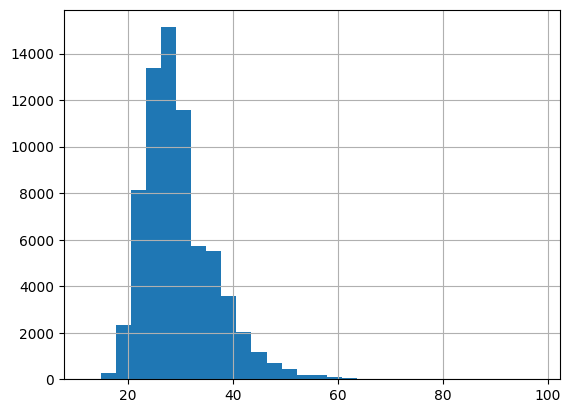

In [107]:
diabetes_df['BMI'].hist(bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x11f58f200>,
 'caps': [<matplotlib.lines.Line2D at 0x11f58edb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f5df020>],
 'medians': [<matplotlib.lines.Line2D at 0x11f58e7e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11f58e510>],
 'means': []}

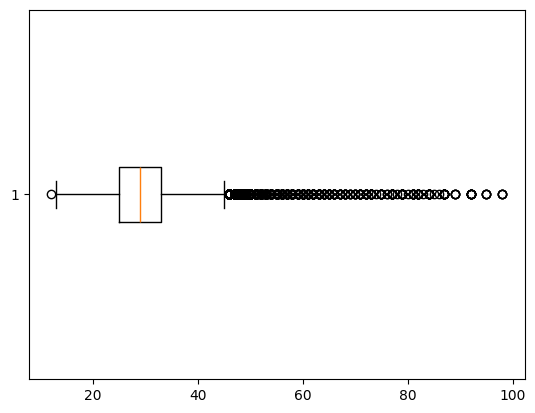

In [108]:
plt.boxplot(diabetes_df['BMI'], vert=False)

In [110]:
df_no_outliers = diabetes_df[(diabetes_df['BMI'] >= 13) & (diabetes_df['BMI'] <= 45)]
print(df_no_outliers['BMI'].describe())

count    68511.000000
mean        29.129673
std          5.695466
min         13.000000
25%         25.000000
50%         28.000000
75%         33.000000
max         45.000000
Name: BMI, dtype: float64


I will remove outliers during my cleaning phase as I believe they represent extreme cases/ potential errors when reported. I believe removing them from my dataset will reflect more accurate findings for the general population. 

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

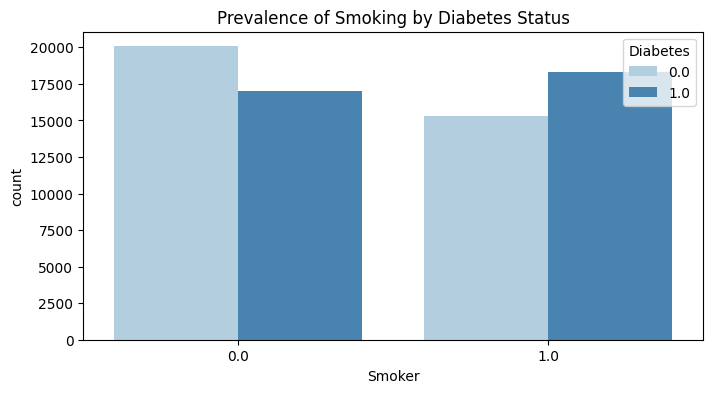

In [99]:
# chart to help visualize smoking patterns prevalance in those who have and don't have diabetes 

plt.figure(figsize=(8,4))
sns.countplot(x='Smoker',hue='Diabetes', data=diabetes_df, palette='Blues')
plt.title("Prevalence of Smoking by Diabetes Status")
plt.xlabel('Smoker')
plt.show()

# smoking has the inverse relationship when looking at those who have and do not have diabetes 

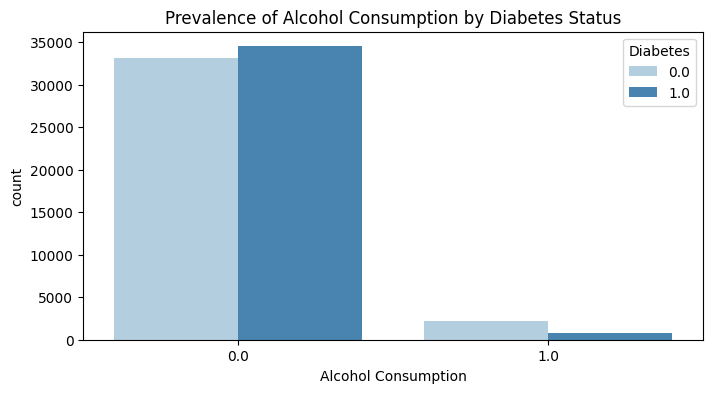

In [111]:
# chart to help visualize alcohol consuptiom in those who have and don't have diabetes 

plt.figure(figsize=(8,4))
sns.countplot(x='HvyAlcoholConsump',hue='Diabetes', data=diabetes_df, palette='Blues')
plt.title("Prevalence of Alcohol Consumption by Diabetes Status")
plt.xlabel('Alcohol Consumption')
plt.show()

# heavy alcohol consumption is only seen in a small portion of the participants

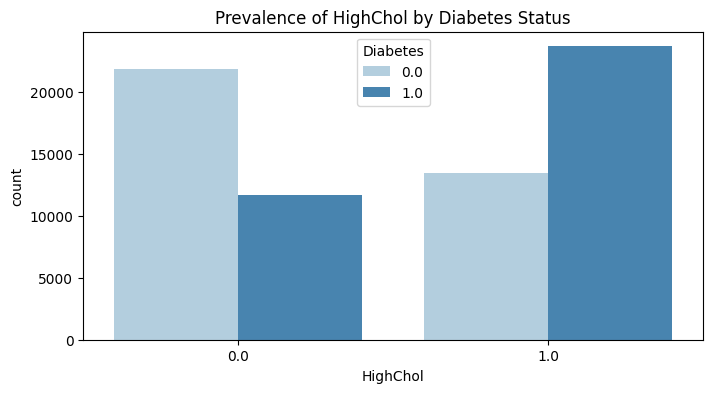

In [112]:
# chart to help visualize HighBP prevalance in those who have and don't have diabetes 

plt.figure(figsize=(8,4))
sns.countplot(x='HighChol',hue='Diabetes', data=diabetes_df, palette='Blues')
plt.title("Prevalence of HighChol by Diabetes Status")
plt.xlabel('HighChol')
plt.show()

# those who do not have diabetes have a higher reporting of not having HighChol, and those who do have diabetes reported higher for also having HighChol

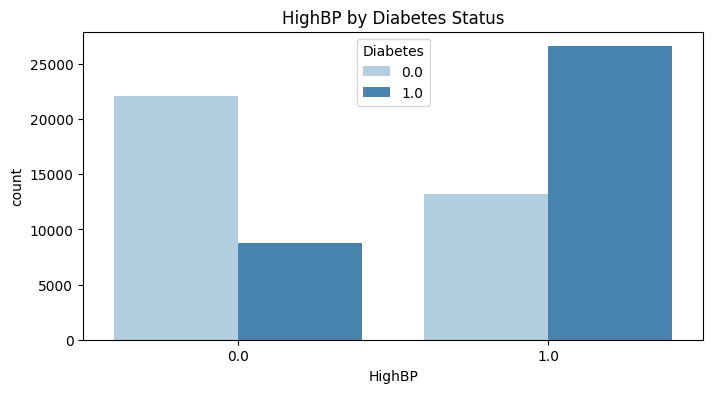

In [113]:
# chart to help visualize HighBP prevalance in those who have and don't have diabetes 

plt.figure(figsize=(8,4))
sns.countplot(x='HighBP',hue='Diabetes', data=diabetes_df, palette='Blues')
plt.title("HighBP by Diabetes Status")
plt.xlabel('HighBP')
plt.show()

# those who do not have diabetes have a higher reporting of not having HighBP, and those who do have diabetes reported higher for also having HighChol

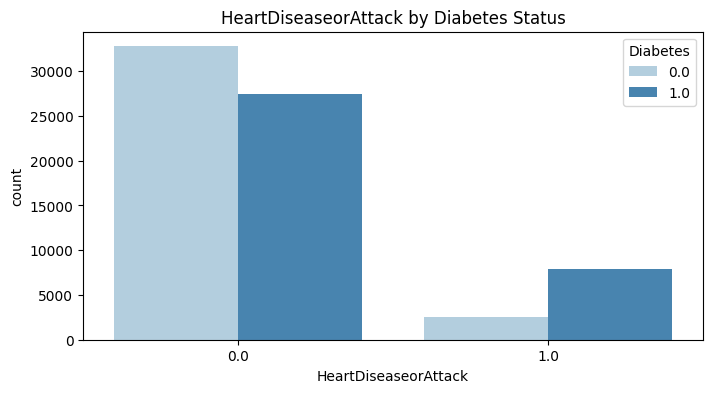

In [114]:
# chart to help visualize HeartDiseaseorAttack prevalance in those who have and don't have diabetes 

plt.figure(figsize=(8,4))
sns.countplot(x='HeartDiseaseorAttack',hue='Diabetes', data=diabetes_df, palette='Blues')
plt.title("HeartDiseaseorAttack by Diabetes Status")
plt.xlabel('HeartDiseaseorAttack')
plt.show()

# overall, the survey participants who have experienced a HeartDiseaseorAttack is low, but will look into further 

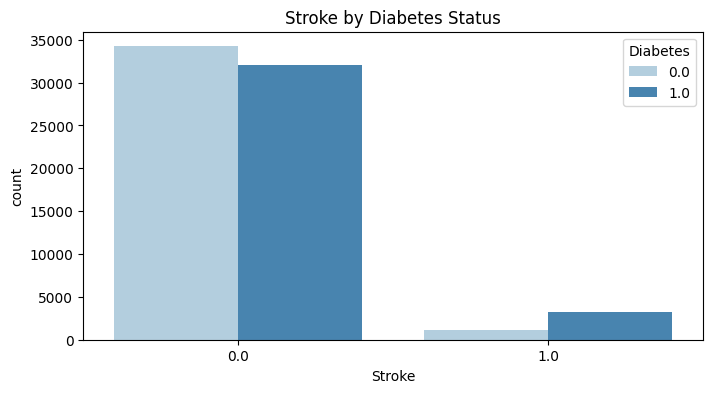

In [115]:
# chart to help visualize Stroke prevalance in those who have and don't have diabetes 

plt.figure(figsize=(8,4))
sns.countplot(x='Stroke',hue='Diabetes', data=diabetes_df, palette='Blues')
plt.title("Stroke by Diabetes Status")
plt.xlabel('Stroke')
plt.show()

# overall, the survey participants who have experienced a Stroke is low, but will look into further 

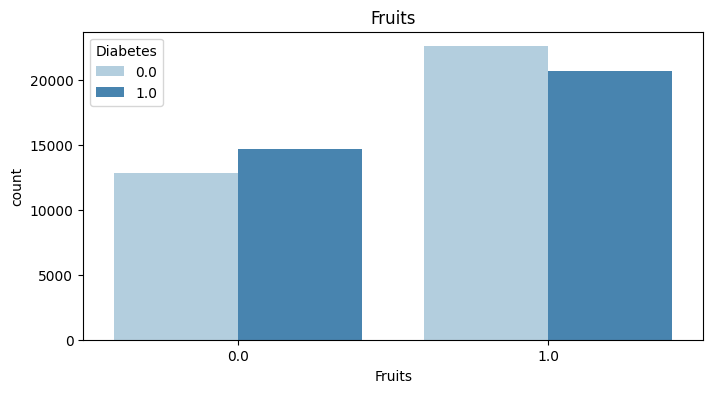

In [117]:
# chart to help visualize Fruit intake in those who have and don't have diabetes 

plt.figure(figsize=(8,4))
sns.countplot(x='Fruits',hue='Diabetes', data=diabetes_df, palette='Blues')
plt.title("Fruits")
plt.xlabel('Fruits')
plt.show()

# no major differences seem to be present across both groups

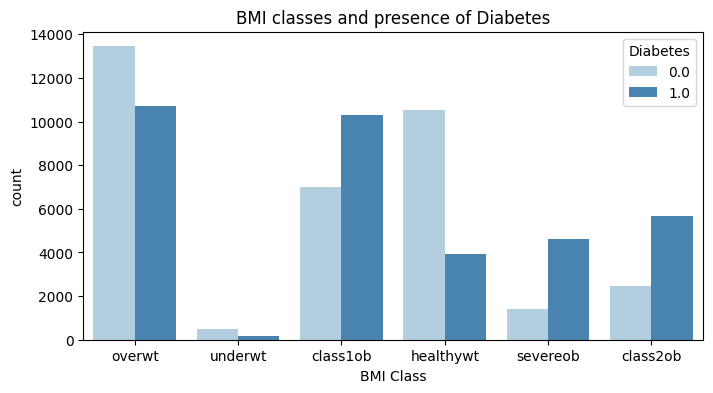

In [128]:
#creating a function to put BMIs in their respective groups
def function(BMI):
        if BMI < 18.5:
                return 'underwt'
        elif 18.5 <= BMI <= 24.9:
                return 'healthywt'
        elif 25 <= BMI <= 29.9:
                return 'overwt'
        elif 30 <= BMI <= 34.9:
                return 'class1ob'
        elif 35 <= BMI <= 39.9:
                return 'class2ob'
        elif BMI >= 40:
                return 'severeob'

diabetes_df['BMI classes'] = diabetes_df.BMI.apply(function)
plt.figure(figsize=(8,4))
sns.countplot(x='BMI classes',hue='Diabetes', data=diabetes_df, palette='Blues')
plt.title("BMI classes and presence of Diabetes")
plt.xlabel('BMI Class')
plt.show()

# diabetes appears to have a higher prevalance in obesity classes

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
    I was surprised to see the low rates of stroke and heart disease or/and attack among survey participants.
2. Do you have any concerns about your dataset? 
    I do not currently have any majoy concerns about my dataset. The information gathered during my EDA efforts has shown not much cleaning will be required in this dataset. 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
    As I am looking at lifestyle factors and their correlation to hypertension, diabetes, and strokes, I don't think I will be utilizing any data from the hypertension df. For cleaning the dataset, I would like to rename columns in an effort to have a more cohesive dataset. I would also like to join my dataframes but this would result in NaN values as the dfs do not share the same columns.  